In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

[nltk_data] Downloading package vader_lexicon to C:\Users\AARON-
[nltk_data]     PREDATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [12]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

<class 'bs4.element.Tag'>
Stop Trying to Get Rich Quick and Upgrade Your Investing Strategy Instead
Mar-27-21 06:01PM  
3 Stocks Poised for Huge Growth Over the Next Decade
02:06PM  
Boost Your Passive Income With Monthly Dividend Checks From These 3 Stocks
12:04PM  
Teaming Up With Amazon Proves Profitable for Kohl's
12:00PM  


In [8]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Mar-27-21',
  '06:01PM',
  'Stop Trying to Get Rich Quick and Upgrade Your Investing Strategy Instead'],
 ['AMZN',
  'Mar-27-21',
  '02:06PM',
  '3 Stocks Poised for Huge Growth Over the Next Decade'],
 ['AMZN',
  'Mar-27-21',
  '12:04PM',
  'Boost Your Passive Income With Monthly Dividend Checks From These 3 Stocks'],
 ['AMZN',
  'Mar-27-21',
  '12:00PM',
  "Teaming Up With Amazon Proves Profitable for Kohl's"],
 ['AMZN', 'Mar-27-21', '11:48AM', '3 Stocks Robinhood Investors Love'],
 ['AMZN',
  'Mar-27-21',
  '11:23AM',
  'Amazon Goes On Twitter Offensive Against US Sens. Sanders, Warren Amid Unionization Campaign'],
 ['AMZN', 'Mar-27-21', '08:45AM', 'Better Buy: Amazon vs. Etsy'],
 ['AMZN', 'Mar-27-21', '07:55AM', 'Could Sea Limited Be a 10-Bagger Stock?'],
 ['AMZN',
  'Mar-27-21',
  '07:52AM',
  "Intel's new CEO was pushed out of the company years ago here's how he came back"],
 ['AMZN',
  'Mar-27-21',
  '07:45AM',
  '2 Tech Stocks That Turned $10,000 Into $180,000 (or 

In [9]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2021-03-27,06:01PM,Stop Trying to Get Rich Quick and Upgrade Your...,0.139,0.633,0.228,0.3400
1,AMZN,2021-03-27,02:06PM,3 Stocks Poised for Huge Growth Over the Next ...,0.000,0.465,0.535,0.7096
2,AMZN,2021-03-27,12:04PM,Boost Your Passive Income With Monthly Dividen...,0.000,0.667,0.333,0.5423
3,AMZN,2021-03-27,12:00PM,Teaming Up With Amazon Proves Profitable for K...,0.000,0.566,0.434,0.5574
4,AMZN,2021-03-27,11:48AM,3 Stocks Robinhood Investors Love,0.000,0.417,0.583,0.6369


In [10]:
parsed_and_scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2021-03-27,06:01PM,Stop Trying to Get Rich Quick and Upgrade Your...,0.139,0.633,0.228,0.3400
1,AMZN,2021-03-27,02:06PM,3 Stocks Poised for Huge Growth Over the Next ...,0.000,0.465,0.535,0.7096
2,AMZN,2021-03-27,12:04PM,Boost Your Passive Income With Monthly Dividen...,0.000,0.667,0.333,0.5423
3,AMZN,2021-03-27,12:00PM,Teaming Up With Amazon Proves Profitable for K...,0.000,0.566,0.434,0.5574
4,AMZN,2021-03-27,11:48AM,3 Stocks Robinhood Investors Love,0.000,0.417,0.583,0.6369
...,...,...,...,...,...,...,...,...
295,GOOG,2021-03-23,08:57AM,Tech Giants to Watch as COVID-19 Vaccination D...,0.000,1.000,0.000,0.0000
296,GOOG,2021-03-23,08:27AM,2 Tech Stocks to Buy After the Recent Sell-Off,0.000,1.000,0.000,0.0000
297,GOOG,2021-03-23,08:15AM,"Gmail, Chrome, and Amazon are crashing on Andr...",0.133,0.741,0.126,-0.0258
298,GOOG,2021-03-23,08:13AM,Dow Jones Futures Fall: Are Tech Stocks Back? ...,0.000,1.000,0.000,0.0000


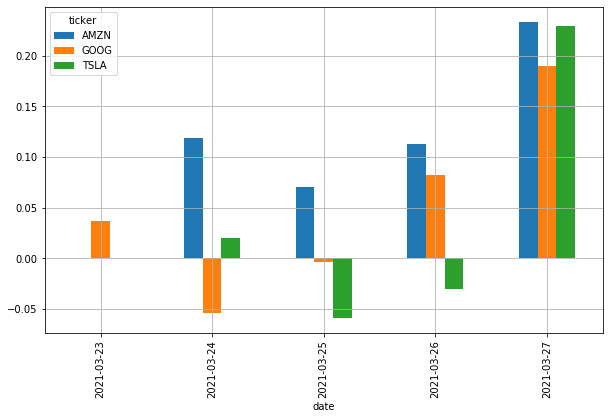

In [11]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()